# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [13]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [16]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [17]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    2405142 Apr 27 17:44 data_cache/coding_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2405142 May  7 11:14 data_cache/coding_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2405143 May  7 09:00 data_cache/coding_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  169827968 May  9 16:35 data_cache/coding_data.npy
-rw-r--r--  1 laurentperrinet  staff  169827968 May 11 13:52 data_cache/coding_test_data.npy


In [18]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -1.3425387896193824e-05  +/-  0.005884598016072352
average energy of data =  0.18808326809398868 +/- 0.07074991784868241


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.8068117666194947e-05 +/- 0.0014107773390163649
average energy of filters =  1.0 +/- 4.026288882119595e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.6004507309775894e-05 +/- 0.001472797489052693
average energy of filters =  1.0 +/- 4.129104294410826e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.8702498728228594e-05 +/- 0.0013714371710944425
average energy of filters =  1.0 +/- 3.8488312480383476e-17


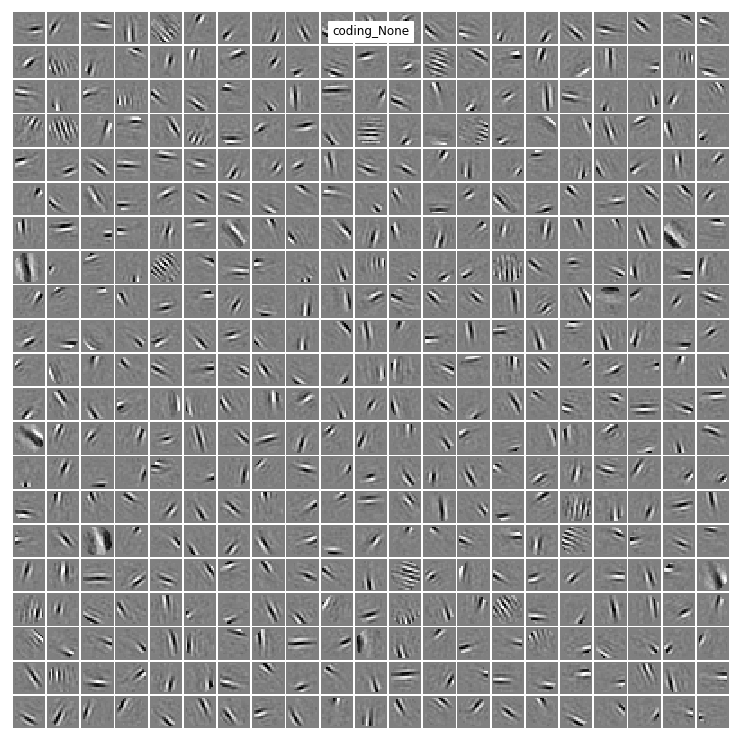

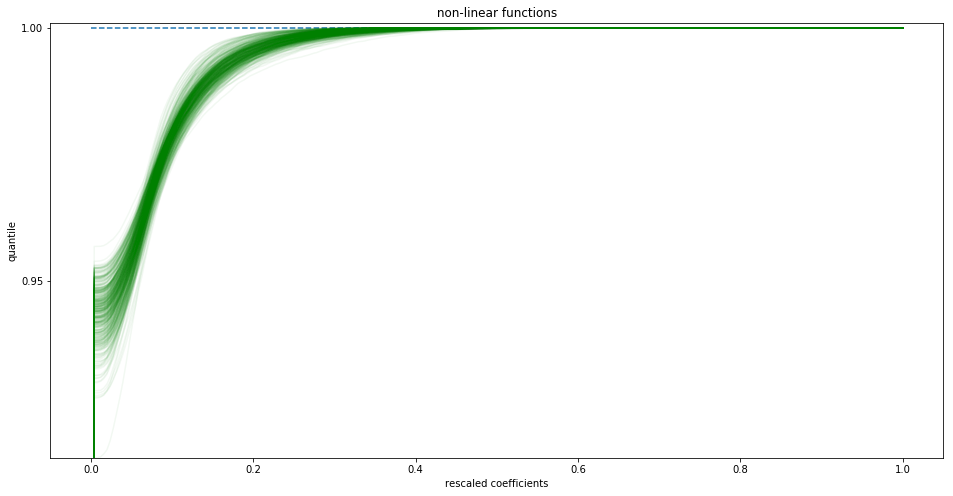

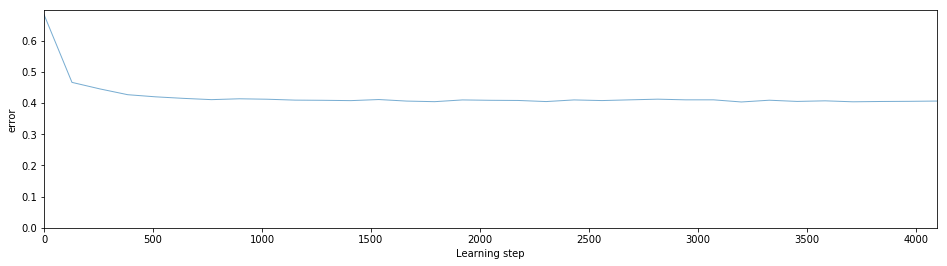

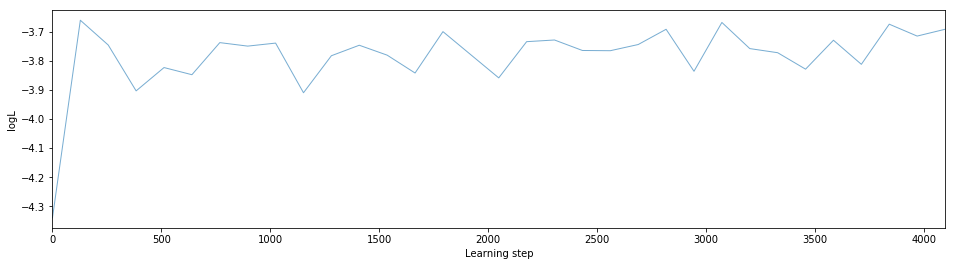

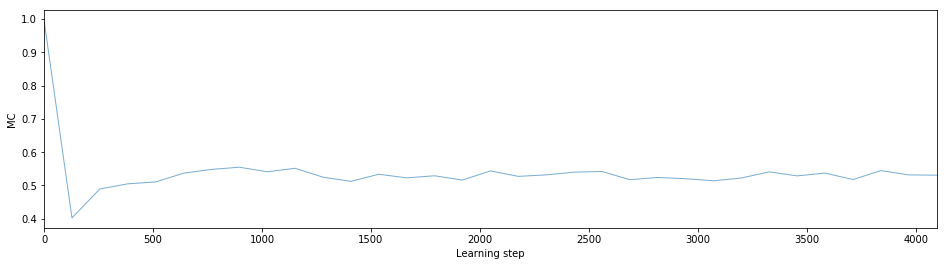

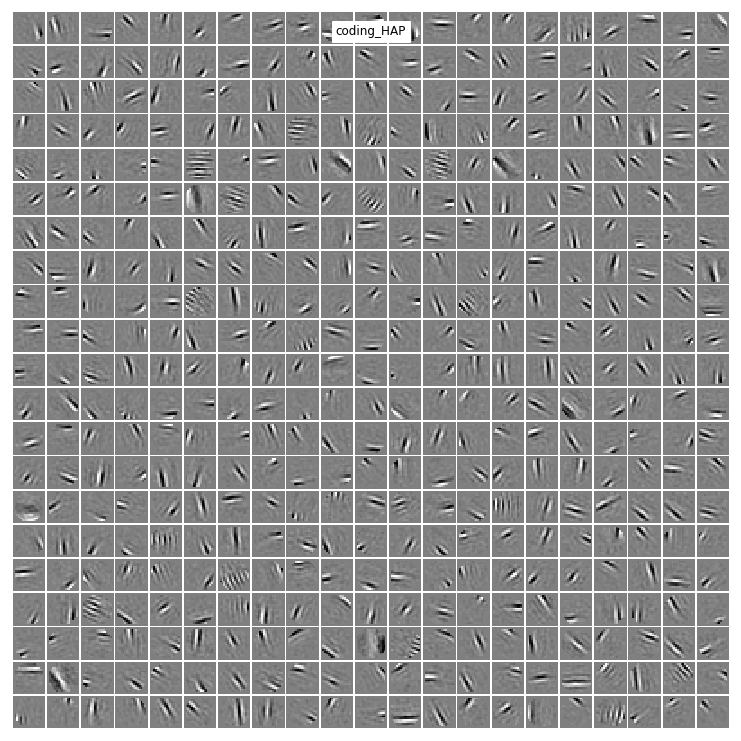

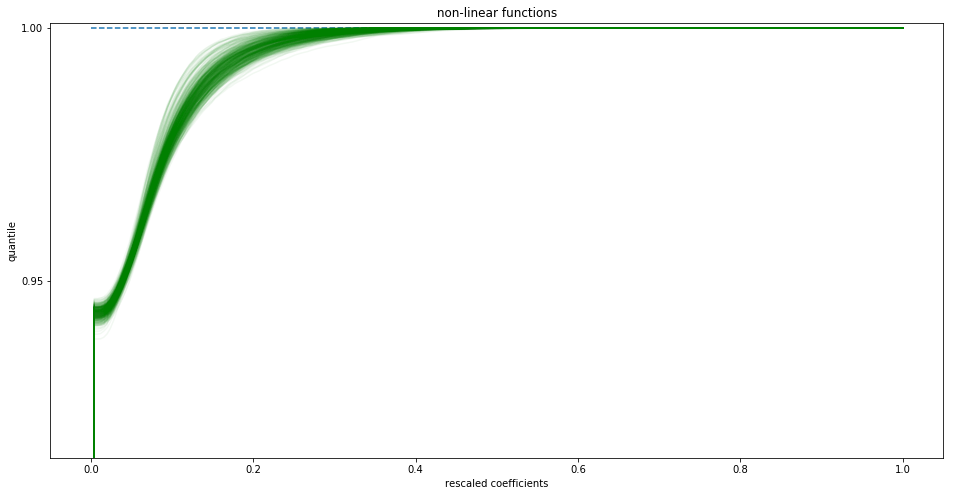

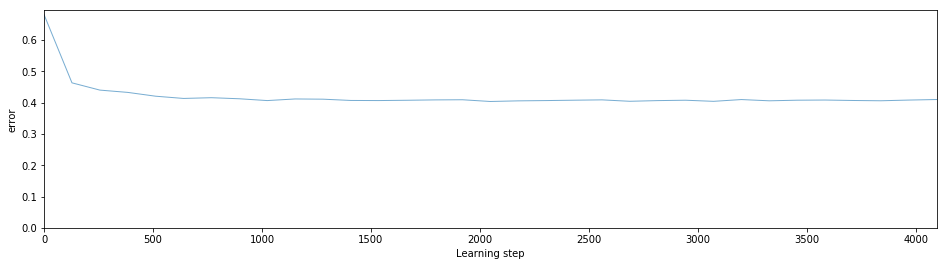

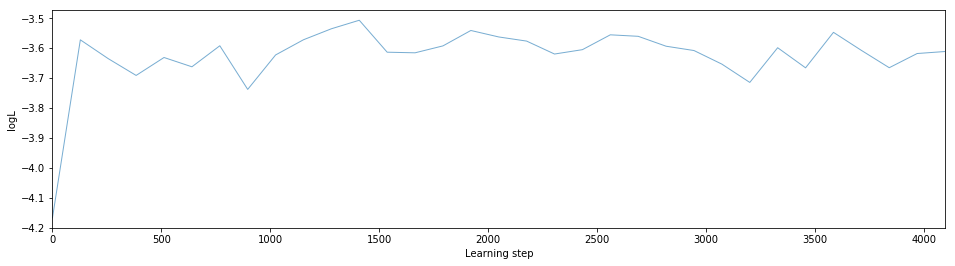

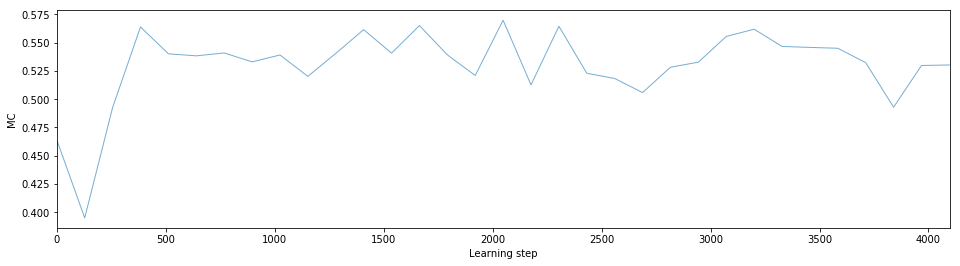

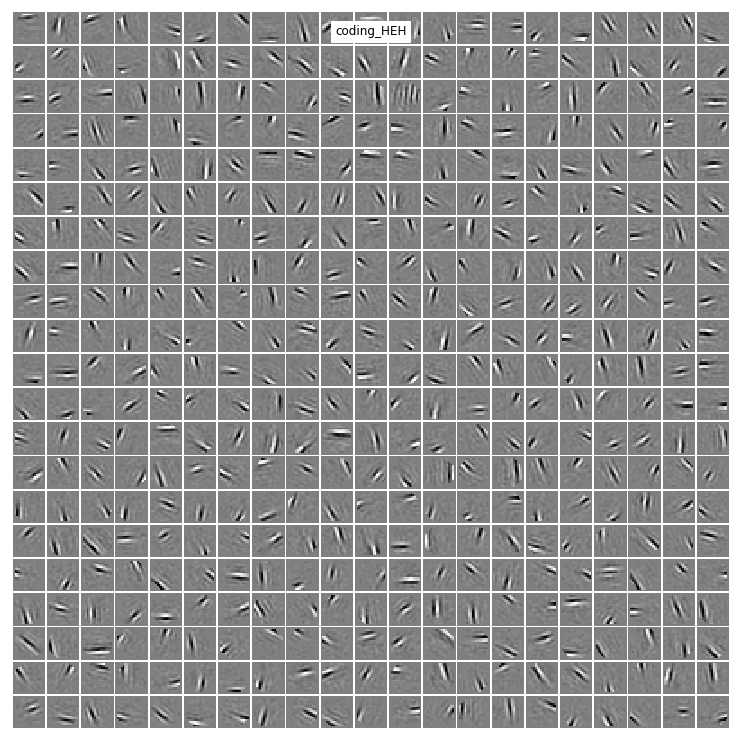

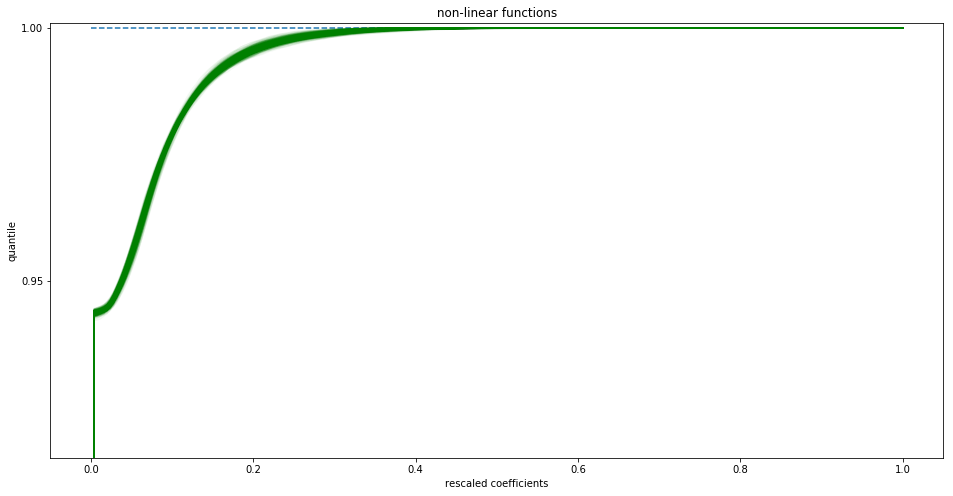

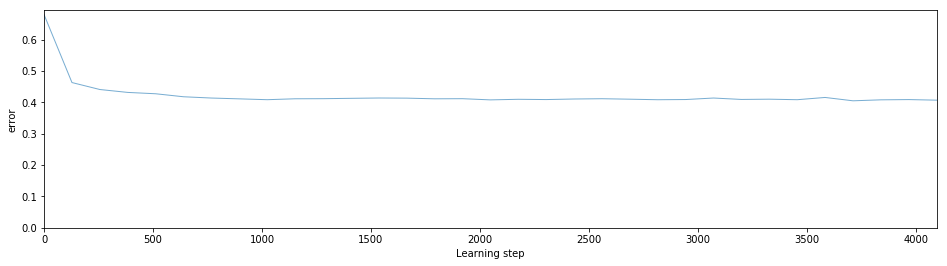

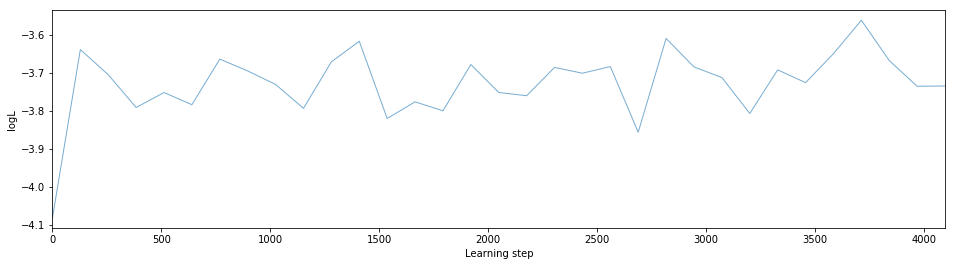

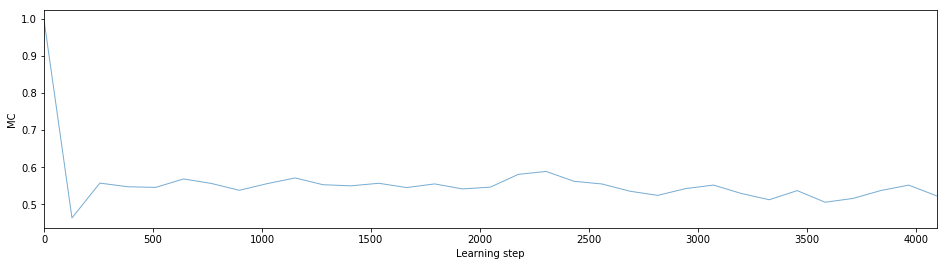

In [20]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030376499334477152
average std of codewords =  0.15494064256299672
l0-sparseness of codewords =  0.05640866372590703
std of the average of individual patches =  0.0037478123809977144


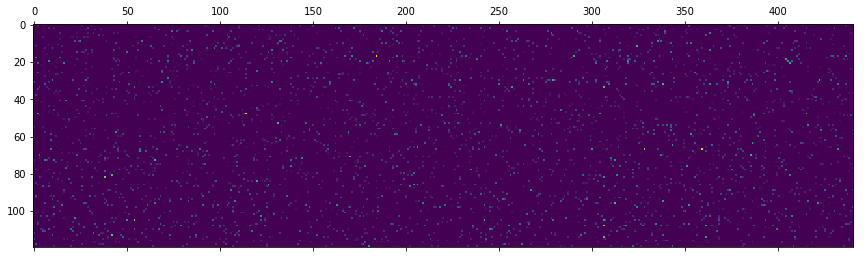

<Figure size 1080x216 with 0 Axes>

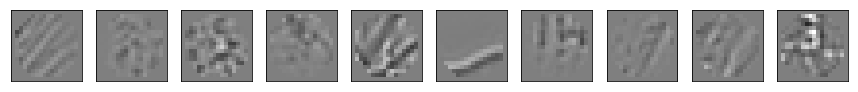

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

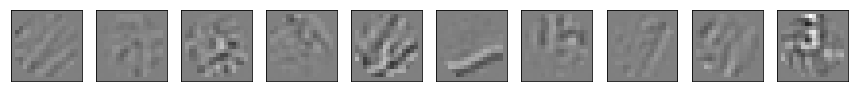

<Figure size 1080x216 with 0 Axes>

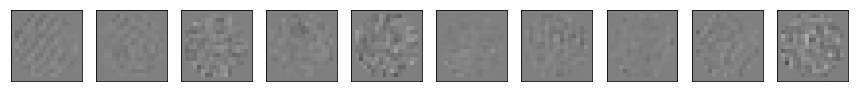

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.00037105805494880734 +/- 0.004040648068058719
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.00037105805494880734 +/- 0.08186822779275892
average energy of residual =  0.0757054215346148 +/- 0.031164620265189923
median energy of residual =  0.07553589276235037
average gain of coding =  2.5768401988147396 +/- 0.5277351128145724
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.03037649933447715
average std of codewords =  0.1549406425629967
l0-sparseness of codewords =  0.05640866372590703
std of the average of individual patches =  0.0037478123809977144


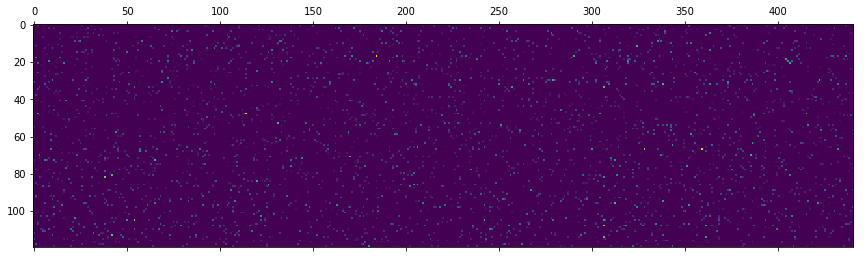

<Figure size 1080x216 with 0 Axes>

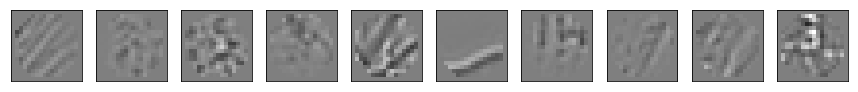

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

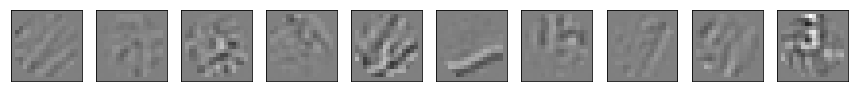

<Figure size 1080x216 with 0 Axes>

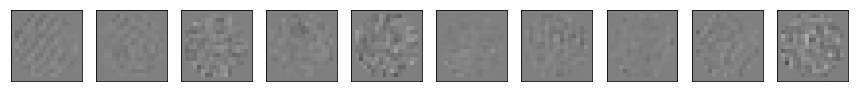

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.0003710580549488073 +/- 0.004040648068058719
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.0003710580549488073 +/- 0.0818682277927589
average energy of residual =  0.0757054215346148 +/- 0.031164620265189923
median energy of residual =  0.07553589276235037
average gain of coding =  2.5768401988147396 +/- 0.5277351128145724
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.029403803136222612
average std of codewords =  0.1538524708494384
l0-sparseness of codewords =  0.053985526502267574
std of the average of individual patches =  0.006291993979130115


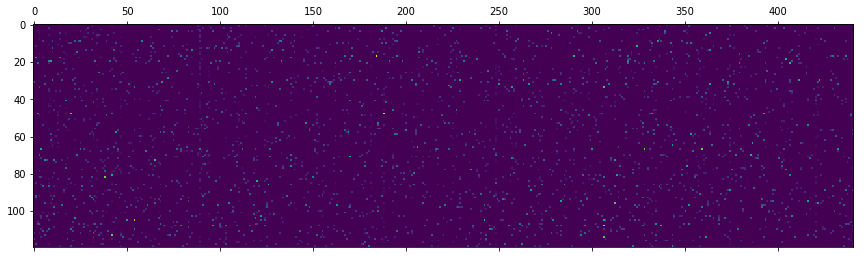

<Figure size 1080x216 with 0 Axes>

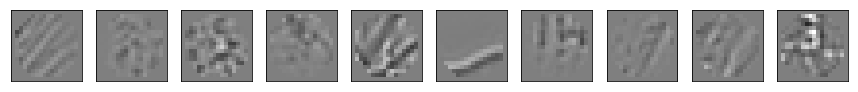

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

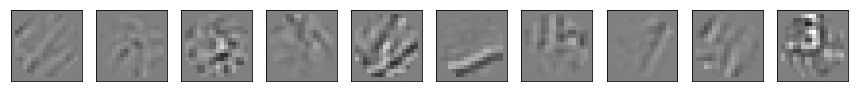

<Figure size 1080x216 with 0 Axes>

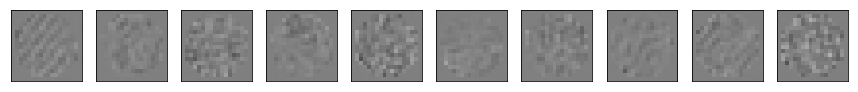

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.0003019775502859273 +/- 0.004162032296382659
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.0003019775502859273 +/- 0.08532734713682642
average energy of residual =  0.08050120285925055 +/- 0.02829140678833684
median energy of residual =  0.07826810750243106
average gain of coding =  2.336339722996435 +/- 0.42110371789873513
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030401917154761576
average std of codewords =  0.15495751350650658
l0-sparseness of codewords =  0.0564391121031746
std of the average of individual patches =  0.0035820740639772868


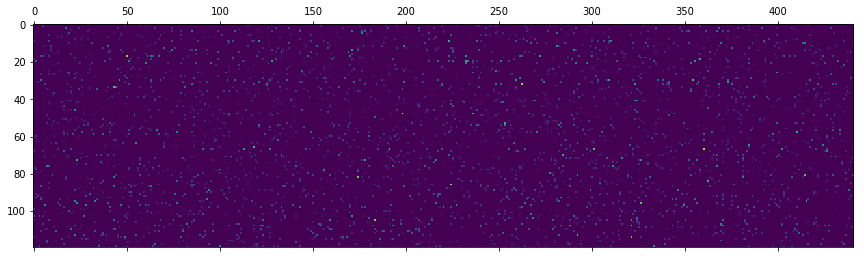

<Figure size 1080x216 with 0 Axes>

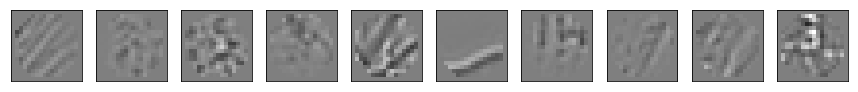

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

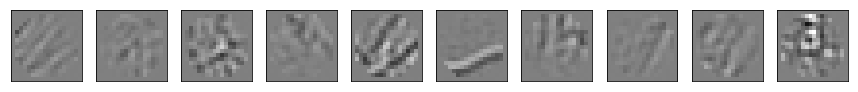

<Figure size 1080x216 with 0 Axes>

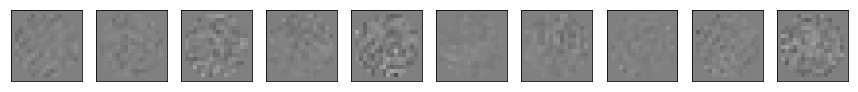

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  7.263357894620075e-05 +/- 0.004031357815794999
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  7.263357894620075e-05 +/- 0.08162149704149338
average energy of residual =  0.07549033425446178 +/- 0.031036808616237265
median energy of residual =  0.07549570421626557
average gain of coding =  2.5848664593833806 +/- 0.5322470766769408
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.03040191715476157
average std of codewords =  0.15495751350650655
l0-sparseness of codewords =  0.0564391121031746
std of the average of individual patches =  0.003582074063977286


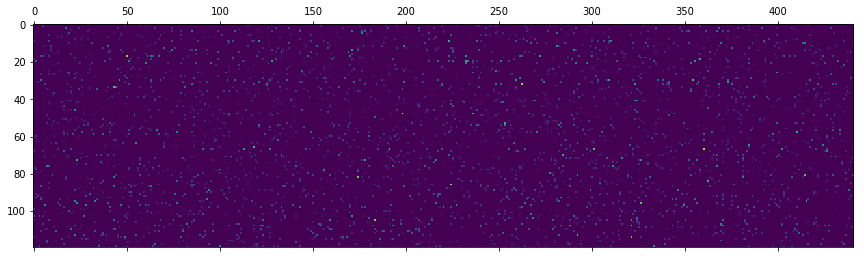

<Figure size 1080x216 with 0 Axes>

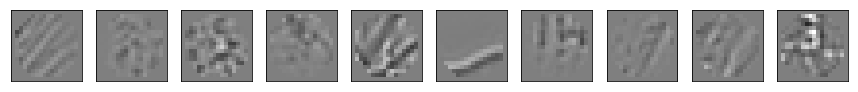

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

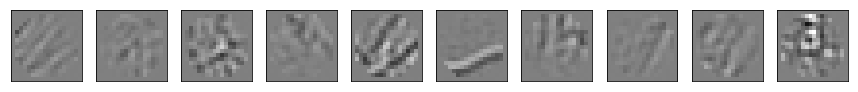

<Figure size 1080x216 with 0 Axes>

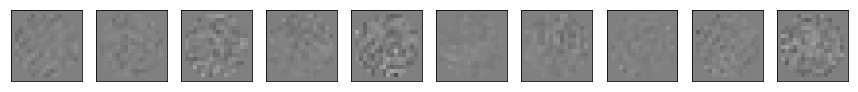

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  7.263357894620054e-05 +/- 0.004031357815794999
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  7.263357894620054e-05 +/- 0.08162149704149338
average energy of residual =  0.07549033425446178 +/- 0.031036808616237265
median energy of residual =  0.07549570421626557
average gain of coding =  2.5848664593833806 +/- 0.5322470766769408
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030291636951394665
average std of codewords =  0.15445646724666987
l0-sparseness of codewords =  0.05609089338860544
std of the average of individual patches =  0.0041645954117553625


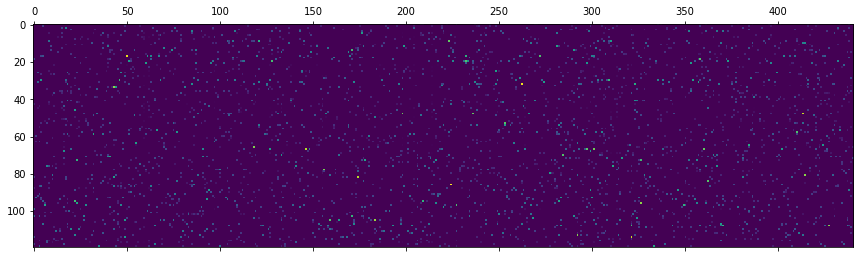

<Figure size 1080x216 with 0 Axes>

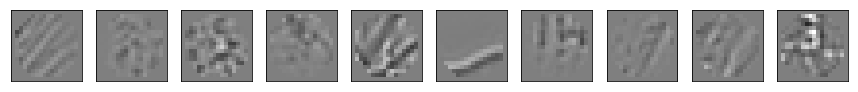

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

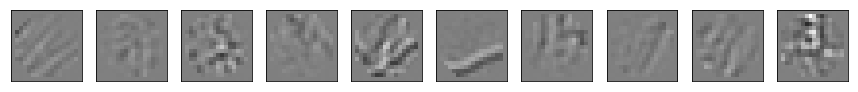

<Figure size 1080x216 with 0 Axes>

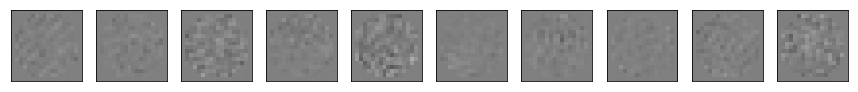

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  0.0002912821662477415 +/- 0.004062678335653811
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  0.0002912821662477415 +/- 0.08291058179343512
average energy of residual =  0.07688051252439694 +/- 0.031042490438305894
median energy of residual =  0.07618258151660481
average gain of coding =  2.5104175844244576 +/- 0.4685612675746644
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030256881243088063
average std of codewords =  0.15459317034176834
l0-sparseness of codewords =  0.056430254393424036
std of the average of individual patches =  0.0030869655580467547


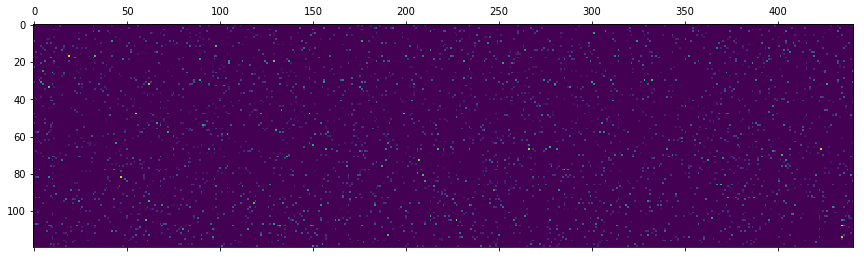

<Figure size 1080x216 with 0 Axes>

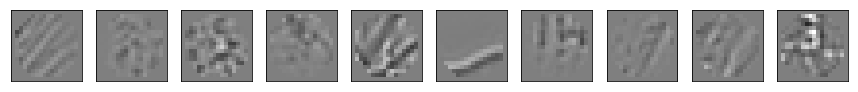

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

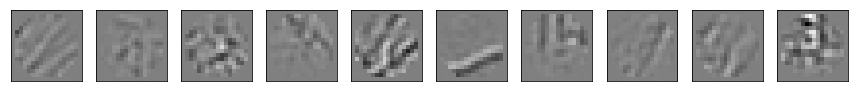

<Figure size 1080x216 with 0 Axes>

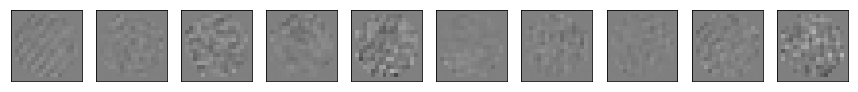

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.0002970907814891728 +/- 0.004070886308464213
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.0002970907814891728 +/- 0.08240864198494419
average energy of residual =  0.07619525089418153 +/- 0.03139357064603957
median energy of residual =  0.0760945692911813
average gain of coding =  2.5602349586061313 +/- 0.5273534367610194
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030256881243088063
average std of codewords =  0.15459317034176834
l0-sparseness of codewords =  0.056430254393424036
std of the average of individual patches =  0.0030869655580467543


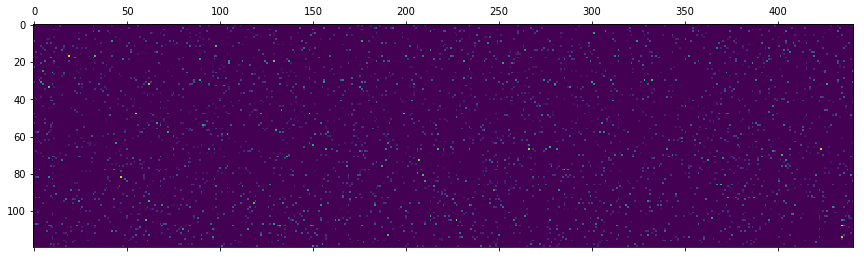

<Figure size 1080x216 with 0 Axes>

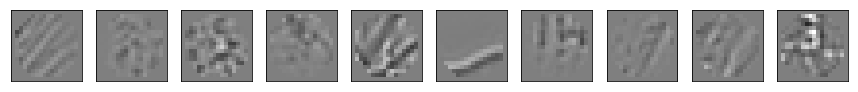

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

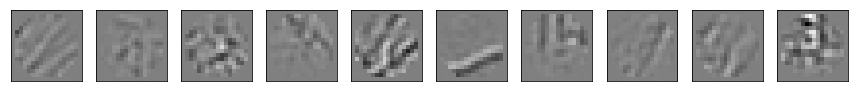

<Figure size 1080x216 with 0 Axes>

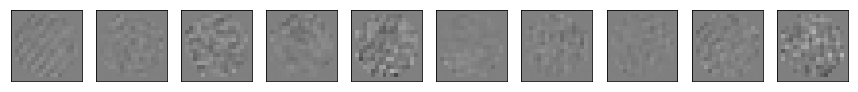

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.00029709078148917254 +/- 0.004070886308464213
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.00029709078148917254 +/- 0.08240864198494419
average energy of residual =  0.07619525089418153 +/- 0.03139357064603957
median energy of residual =  0.0760945692911813
average gain of coding =  2.5602349586061313 +/- 0.5273534367610194
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.030228120798095212
average std of codewords =  0.15461229074197527
l0-sparseness of codewords =  0.05638264420351474
std of the average of individual patches =  0.00290433393287785


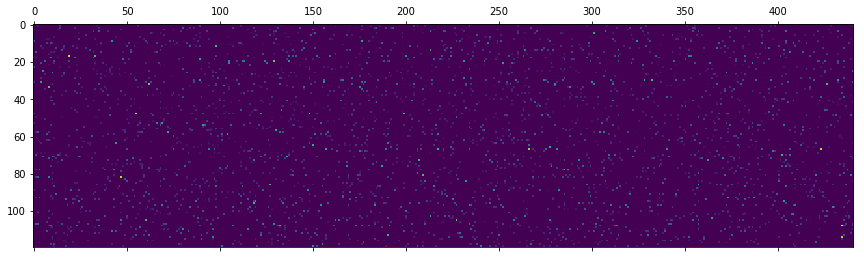

<Figure size 1080x216 with 0 Axes>

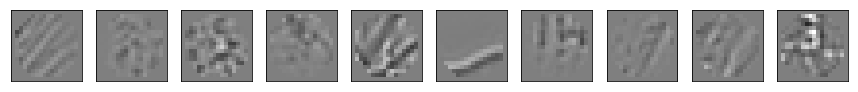

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

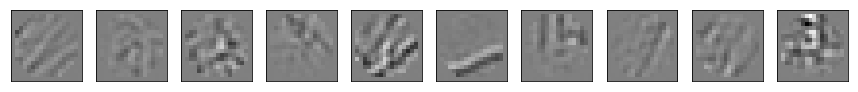

<Figure size 1080x216 with 0 Axes>

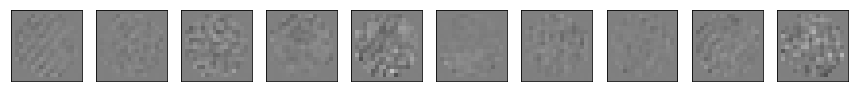

average of data patches =  -1.8709326303595485e-05 +/- 0.005615102546437357
average of residual patches =  -0.0003299238825721068 +/- 0.004123000506793553
median energy of data =  0.1873191812383111
average energy of data =  0.18803881274453335 +/- 0.07105811604592652
average error =  -0.0003299238825721068 +/- 0.08252146658861775
average energy of residual =  0.07639453845637337 +/- 0.031205380813929165
median energy of residual =  0.07596015926447382
average gain of coding =  2.544125883791261 +/- 0.5090746809652007


In [22]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [23]:
coding_gain

{'None': {'Non': 2.5768401988147396,
  'One': 2.5768401988147396,
  'Hom': 2.336339722996435},
 'HAP': {'Non': 2.5848664593833806,
  'One': 2.5848664593833806,
  'Hom': 2.5104175844244576},
 'HEH': {'Non': 2.5602349586061313,
  'One': 2.5602349586061313,
  'Hom': 2.544125883791261}}

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
Fri May 11 13:23:22 2018 CEST